<figure>
  <IMG src="figures/logo-esi-sba.png" WIDTH=300 height="100" ALIGN="right">
</figure>

# Practical Trainining Series on Modeling And Simulation   
*By Dr. Belkacem KHALDI (b.khaldi@esi-sba.dz)*

## Notebook 7: Modeling and Simulating Discrete-Event Systems
<figure>
  <IMG src="figures/ch7-des-fig1.png" WIDTH=400 height="400" ALIGN="right">
</figure>

In this Notebook you learn how to model and simulate Discerte-Event systems using simpy python library.
Discrete-Event Systems are a type of systems that are driven by discret-events. The state of such systems is changed whenever an event occures. The occurence of an event is mostely stochastic in time and therefore the  inter-arival events time is discret. 

### simpy
SimPy is a discrete-event simulation library. The behavior of active components (like vehicles, customers or messages) is modeled with processes. All processes live in an environment. They interact with the environment and with each other via events.

 First of all we will need the simpy python library to simulate such systens    

In [1]:
# Install a pip package in the current Jupyter kernel
import sys
!{sys.executable} -m pip install simpy
import simpy

'C:\Program' n'est pas reconnu en tant que commande interne
ou externe, un programme ex‚cutable ou un fichier de commandes.


### Our First Process
Let's simulate our first example which will be about a Customer visiting a Bank. We assume that the Bank is always full of customers and when the visitor arrives, he will stay just 10 minites there and then leave the Bank without even being served. We assume also that our customer will frequently visit the Bank each 30 minutes and he will alternately arrive and leave for a while. When he arrives (or leaves) the Bank, we will print and save both the current sate and simulation time. So, the customer switches between the states arriving and departure.

Mr. KHALDI Arrives at the Bank at 0
Mr. KHALDI leaves the Bank at 10
Mr. KHALDI Arrives at the Bank at 40
Mr. KHALDI leaves the Bank at 50
Mr. KHALDI Arrives at the Bank at 80
Mr. KHALDI leaves the Bank at 90


Text(0, 0.5, 'State')

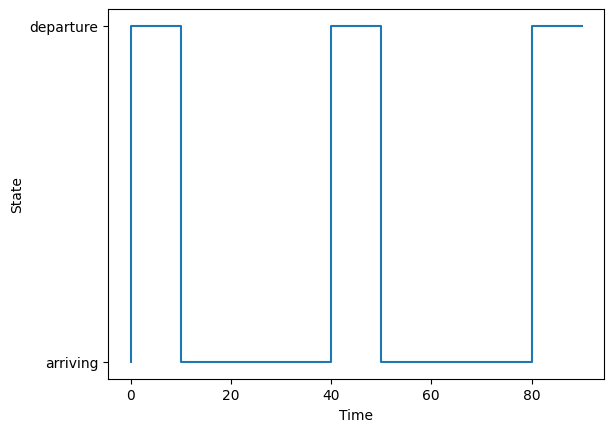

In [2]:
import simpy
import pandas as pd
import matplotlib.pyplot as plt

arriving_duration = 10
departure_duration = 30
simulation_time=120
#A list for saving purposes
events=[]
#Define a customer process that requires a reference to an simpy.Environment (env) in order to create new events
def Customer(env,name):
    # To be runned in infinite loop. 
    while True:
        #Announcing the arriving state by printing a message and the current simulation time
        print('Mr. %s Arrives at the Bank at %d' % (name, env.now))
        #save the actual time and state 
        events.append([env.now,'arriving'])
        
        
        #Create a Timeout event and wait for the event to occur. in a given amount of time
        yield env.timeout(arriving_duration)
        
        
        #Announcing the departure state by printing a message and the current simulation time
        print('Mr. %s leaves the Bank at %d' % (name, env.now))
        #save the actual time and state 
        events.append([env.now,'departure'])
        
        #Create a Timeout event and wait for the event to occur. in a given amount of time
        yield env.timeout(departure_duration)
        
        
# create an instance of Simpy Environment. 
env = simpy.Environment()
#Passing env into our customer process function. 
#Started a process and added to the environment

env.process(Customer(env,'KHALDI'))
#start the simulation by calling run() and passing an end time to it.
env.run(until=simulation_time)

#Create a dataframe from list events and plot
df=pd.DataFrame(events, columns=['time','event'])
plt.step(df['time'],df['event'])
plt.xlabel('Time')
plt.ylabel('State')

### Challenge 1:
Recretae the above scenario by assuming now that the arriving and departure duration are stochastic (random).
#### Hint
Use randint from the random import library

In [3]:
!pip install simpy

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 25.0.1 -> 25.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Mr. KHALDI Arrives at the Bank at 0
Mr. KHALDI leaves the Bank at 5
Mr. KHALDI Arrives at the Bank at 8
Mr. KHALDI leaves the Bank at 10
Mr. KHALDI Arrives at the Bank at 13
Mr. KHALDI leaves the Bank at 14
Mr. KHALDI Arrives at the Bank at 25
Mr. KHALDI leaves the Bank at 28
Mr. KHALDI Arrives at the Bank at 48
Mr. KHALDI leaves the Bank at 49
Mr. KHALDI Arrives at the Bank at 75
Mr. KHALDI leaves the Bank at 77
Mr. KHALDI Arrives at the Bank at 77
Mr. KHALDI leaves the Bank at 83
Mr. KHALDI Arrives at the Bank at 86
Mr. KHALDI leaves the Bank at 89
Mr. KHALDI Arrives at the Bank at 119


Text(0, 0.5, 'State')

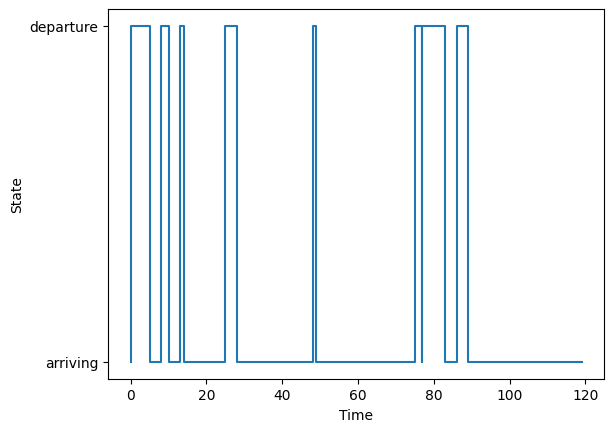

In [4]:
#your code hereimport simpy
import pandas as pd
import matplotlib.pyplot as plt
import random
import simpy


simulation_time=120
#A list for saving purposes
events=[]
#Define a customer process that requires a reference to an simpy.Environment (env) in order to create new events
def Customer(env,name):
    # To be runned in infinite loop. 
    while True:
        arriving_duration = random.randint(0,10)
        departure_duration = random.randint(0,30)
        #Announcing the arriving state by printing a message and the current simulation time
        print('Mr. %s Arrives at the Bank at %d' % (name, env.now))
        #save the actual time and state 
        events.append([env.now,'arriving'])
        
        
        #Create a Timeout event and wait for the event to occur. in a given amount of time
        yield env.timeout(arriving_duration)
        
        
        #Announcing the departure state by printing a message and the current simulation time
        print('Mr. %s leaves the Bank at %d' % (name, env.now))
        #save the actual time and state 
        events.append([env.now,'departure'])
        
        #Create a Timeout event and wait for the event to occur. in a given amount of time
        yield env.timeout(departure_duration)
        
        
# create an instance of Simpy Environment. 
env = simpy.Environment()
#Passing env into our customer process function. 
#Started a process and added to the environment

env.process(Customer(env,'KHALDI'))
#start the simulation by calling run() and passing an end time to it.
env.run(until=simulation_time)

#Create a dataframe from list events and plot
df=pd.DataFrame(events, columns=['time','event'])
plt.step(df['time'],df['event'])
plt.xlabel('Time')
plt.ylabel('State')

## Our Second Process
Let's assume now that our Customer decides to wait for his service at the Bank. We assume that the Bank has one desk that serves all the cutomers with a Queue type notation (D/D/1). The arriver of a customer is set to be each 7 minutes and the time taken to serve a customer is set to be 5 minutes.
### Hint:
This system is of Queue Type Notation D/D/1 because:


In [5]:
"""
Bank example.

Covers:

- Waiting for other processes
- Resources: Resource

Scenario:
  A Bank has a limited number of service desks and defines
  a service processes that takes some (random) time.

  Customer processes arrive at the Bank at a random time. If one Service
  desk is available, they start serving the customer and wait for it
  to finish. If not, they wait until they  use one.

"""
import numpy.random as rnd
import simpy
import pandas as pd


RANDOM_SEED = 42
NUM_DESKS = 1  # Number of service desks in the Bank
SERVICETIME = 5      # Minutes it takes to serve a customer
T_INTER = 10       # Create a customer every ~10 minutes
SIM_TIME = 45     # Simulation time in minutes

events=[]

class Bank(object):
    """A Bank has a limited number of service desks (``NUM_DESKS``) to
    serve customers in parallel.

    Customers have to request one of the service desks. When they got one, they
    be served and wait for the agent to finish their request which 
    takes ``SERVICETIME`` minutes).

    """
    def __init__(self, env, num_desks, service_time):
        self.env = env
        self.desk = simpy.Resource(env, num_desks)
        self.serviceTime = service_time

    def service(self, customer):
        """The service processes. It takes a ``customer`` processes and tries
        to serve it."""
       
        
        yield self.env.timeout(SERVICETIME)
        print("The Bank agent is serving %d%% of %s's service request." %
              (rnd.randint(75, 99), customer))
        events.append([env.now,customer,'in service'])

def customer(env, name, bk):
    """The customer process (each customer has a ``name``) arrives at the Bank
    (``bk``) and requests a service desk.

    It then  waits for the agent to finialize his request and
    leaves to never come back ...

    """
    print('%s arrives at the Bank at %.2f.' % (name, env.now))
    events.append([env.now,name,'arriving'])
    with bk.desk.request() as request:
        #waiting for the customer's turn to be served
        yield request
        events.append([env.now,name,'waiting'])
        print('%s is being served %.2f.' % (name, env.now))
        
        yield env.process(bk.service(name))
        events.append([env.now, name,'departure'])
        print('%s leaves the Bank at %.2f.' % (name, env.now))


def setup(env, num_desks, service_time, t_inter):
    """Create a Bank, a number of initial customers and keep creating customers
    approx. every ``t_inter`` minutes."""
    # Create the Bank
    bk = Bank(env, num_desks, service_time)

    #we assume that at the beginning the 4 customers are already in queue
    for i in range(4):
        env.process(customer(env, 'Customer %d' % i, bk))

    # Create more customers while the simulation is running
    #i=0
    while True:
        yield env.timeout(T_INTER)
        i += 1
        env.process(customer(env, 'Customer %d' % i, bk))


# Setup and start the simulation
print('Bank')


# Create an environment and start the setup process
env = simpy.Environment()
env.process(setup(env, NUM_DESKS, SERVICETIME, T_INTER))

# Execute!
env.run(until=SIM_TIME)

Bank
Customer 0 arrives at the Bank at 0.00.
Customer 1 arrives at the Bank at 0.00.
Customer 2 arrives at the Bank at 0.00.
Customer 3 arrives at the Bank at 0.00.
Customer 0 is being served 0.00.
The Bank agent is serving 85% of Customer 0's service request.
Customer 0 leaves the Bank at 5.00.
Customer 1 is being served 5.00.
Customer 4 arrives at the Bank at 10.00.
The Bank agent is serving 84% of Customer 1's service request.
Customer 1 leaves the Bank at 10.00.
Customer 2 is being served 10.00.
The Bank agent is serving 90% of Customer 2's service request.
Customer 2 leaves the Bank at 15.00.
Customer 3 is being served 15.00.
Customer 5 arrives at the Bank at 20.00.
The Bank agent is serving 98% of Customer 3's service request.
Customer 3 leaves the Bank at 20.00.
Customer 4 is being served 20.00.
The Bank agent is serving 81% of Customer 4's service request.
Customer 4 leaves the Bank at 25.00.
Customer 5 is being served 25.00.
Customer 6 arrives at the Bank at 30.00.
The Bank ag

    time        name       event
0      0  Customer 0    arriving
1      0  Customer 1    arriving
2      0  Customer 2    arriving
3      0  Customer 3    arriving
4      0  Customer 0     waiting
5      0  Customer 1     waiting
6      0  Customer 2     waiting
7      5  Customer 0  in service
8      5  Customer 1  in service
9      5  Customer 2  in service
10     5  Customer 0   departure
11     5  Customer 1   departure
12     5  Customer 2   departure
13     5  Customer 3     waiting
14    10  Customer 4    arriving
15    10  Customer 3  in service
16    10  Customer 4     waiting
17    10  Customer 3   departure
18    15  Customer 4  in service
19    15  Customer 4   departure
20    20  Customer 5    arriving
21    20  Customer 5     waiting
22    25  Customer 5  in service
23    25  Customer 5   departure
24    30  Customer 6    arriving
25    30  Customer 6     waiting
26    35  Customer 6  in service
27    35  Customer 6   departure
28    40  Customer 7    arriving
29    40  

TypeError: Could not convert ['Customer 0Customer 1Customer 2Customer 3Customer 4Customer 5Customer 6Customer 7'
 'waitingwaitingwaitingwaitingwaitingwaitingwaitingwaiting'] to numeric

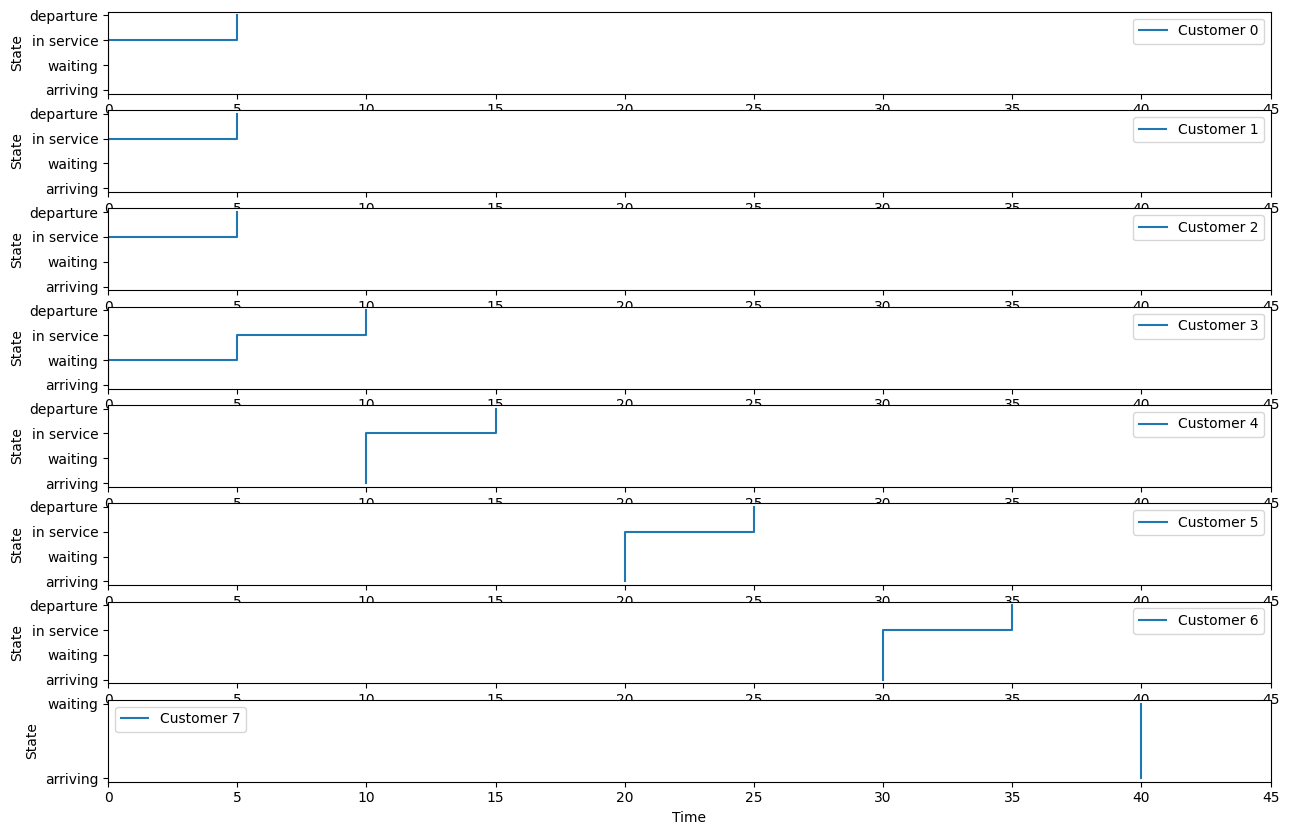

In [8]:
import matplotlib.pyplot as plt
df=pd.DataFrame(events, columns=['time','name','event'])

fig, axs = plt.subplots(len(df['name'].drop_duplicates()),1,figsize=(15,10))
for ax,c in zip(axs.flatten(),df['name'].drop_duplicates()):
    df_c=df.loc[df['name'] == c]
    
    ax.step(df_c['time'],df_c['event'], label=c)
    ax.set_xlabel('Time')
    ax.set_ylabel('State')  
    ax.set_xlim(0, 45)
    ax.legend()

#performance
print(df)
df_w=df.loc[df['event'] == 'waiting']
print('average waiting time: %.2f minutes.' % df_w.mean())

### Challenge 2: (D/D/n)

Now assume that the Bank has more than one service desks. By modifying the code above, model and simulate a Bank queueing system with n=3 service desks.

In [7]:
#your code here

# Setup and start the simulation
RANDOM_SEED = 42
NUM_DESKS = 3  # Number of service desks in the Bank
SERVICETIME = 5      # Minutes it takes to serve a customer
T_INTER = 10       # Create a customer every ~10 minutes
SIM_TIME = 45     # Simulation time in minutes


events=[]

print('Bank')


# Create an environment and start the setup process
env = simpy.Environment()
env.process(setup(env, NUM_DESKS, SERVICETIME, T_INTER))

# Execute!
env.run(until=SIM_TIME)

Bank
Customer 0 arrives at the Bank at 0.00.
Customer 1 arrives at the Bank at 0.00.
Customer 2 arrives at the Bank at 0.00.
Customer 3 arrives at the Bank at 0.00.
Customer 0 is being served 0.00.
Customer 1 is being served 0.00.
Customer 2 is being served 0.00.
The Bank agent is serving 95% of Customer 0's service request.
The Bank agent is serving 76% of Customer 1's service request.
The Bank agent is serving 82% of Customer 2's service request.
Customer 0 leaves the Bank at 5.00.
Customer 1 leaves the Bank at 5.00.
Customer 2 leaves the Bank at 5.00.
Customer 3 is being served 5.00.
Customer 4 arrives at the Bank at 10.00.
The Bank agent is serving 80% of Customer 3's service request.
Customer 4 is being served 10.00.
Customer 3 leaves the Bank at 10.00.
The Bank agent is serving 93% of Customer 4's service request.
Customer 4 leaves the Bank at 15.00.
Customer 5 arrives at the Bank at 20.00.
Customer 5 is being served 20.00.
The Bank agent is serving 79% of Customer 5's service re

In [12]:
import simpy
import pandas as pd
import matplotlib.pyplot as plt

# Simulation setup
env = simpy.Environment()

# Example event logging (replace with your actual simulation)
events = []
def customer_behavior(name, env):
    while True:
        arrival_time = env.now
        events.append((arrival_time, name, 'arrival'))
        yield env.timeout(10)  # Time spent in the bank
        departure_time = env.now
        events.append((departure_time, name, 'departure'))
        yield env.timeout(20)  # Time until next arrival (30 minutes total cycle)

# Start multiple customers
for i in range(3):  # 3 customers for example
    env.process(customer_behavior(f'Customer {i}', env))

# Run simulation
env.run(until=100)  # Simulate for 100 minutes

# Convert events to DataFrame
df = pd.DataFrame(events, columns=['time', 'name', 'event'])
print(df)

    time        name      event
0      0  Customer 0    arrival
1      0  Customer 1    arrival
2      0  Customer 2    arrival
3     10  Customer 0  departure
4     10  Customer 1  departure
5     10  Customer 2  departure
6     30  Customer 0    arrival
7     30  Customer 1    arrival
8     30  Customer 2    arrival
9     40  Customer 0  departure
10    40  Customer 1  departure
11    40  Customer 2  departure
12    60  Customer 0    arrival
13    60  Customer 1    arrival
14    60  Customer 2    arrival
15    70  Customer 0  departure
16    70  Customer 1  departure
17    70  Customer 2  departure
18    90  Customer 0    arrival
19    90  Customer 1    arrival
20    90  Customer 2    arrival


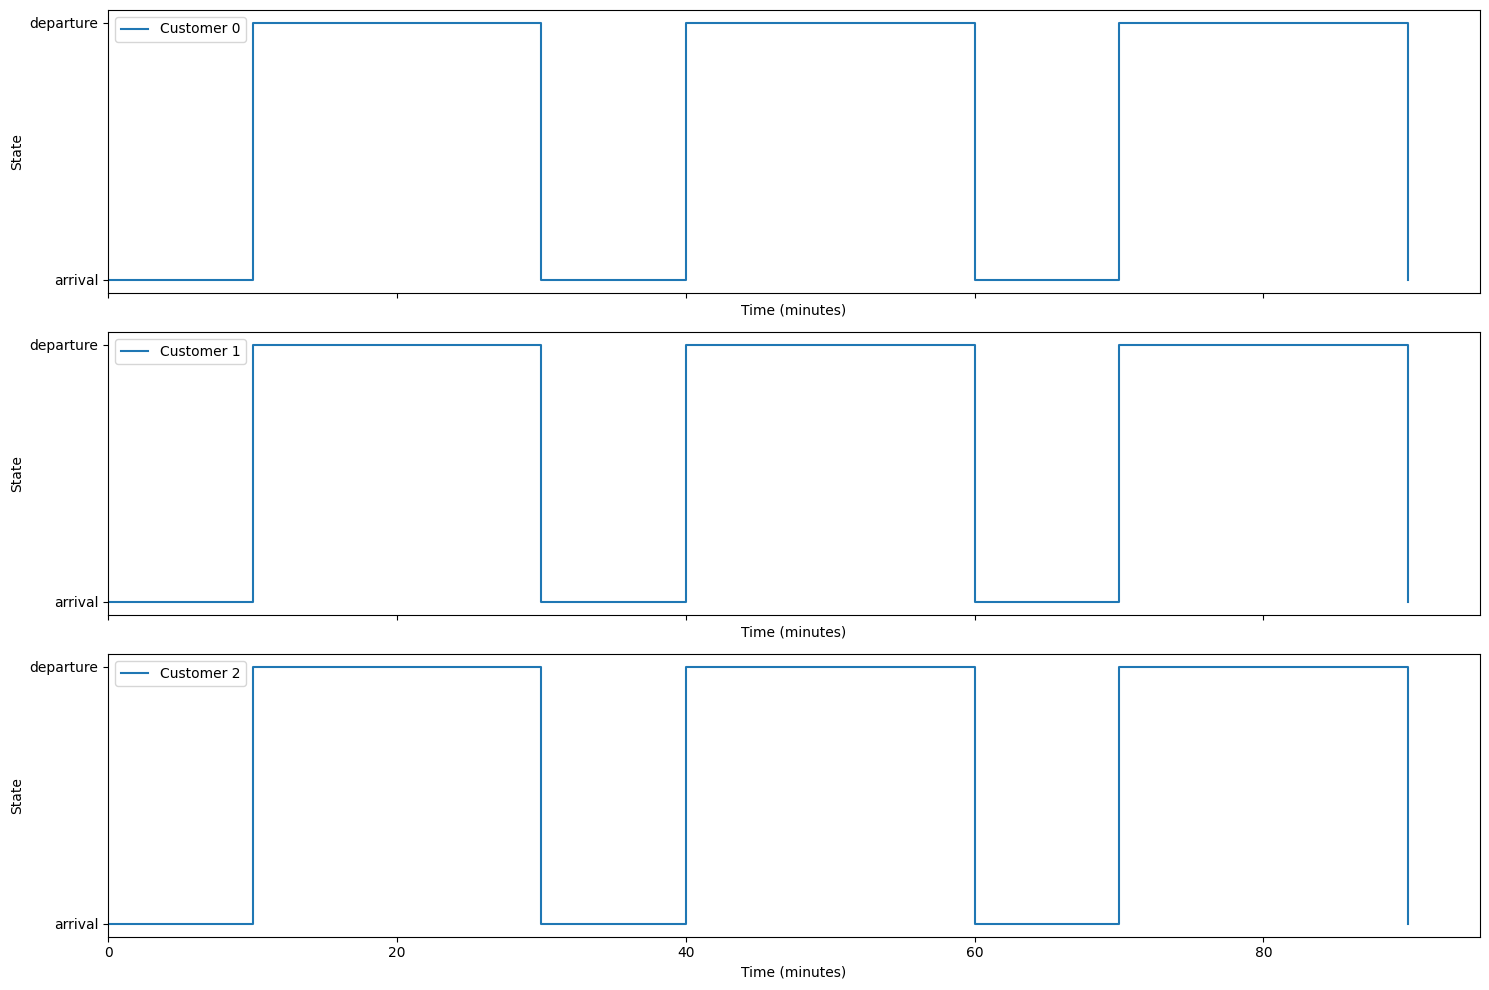

Event Log:
    time        name      event
0      0  Customer 0    arrival
3     10  Customer 0  departure
6     30  Customer 0    arrival
9     40  Customer 0  departure
12    60  Customer 0    arrival
15    70  Customer 0  departure
18    90  Customer 0    arrival
1      0  Customer 1    arrival
4     10  Customer 1  departure
7     30  Customer 1    arrival
10    40  Customer 1  departure
13    60  Customer 1    arrival
16    70  Customer 1  departure
19    90  Customer 1    arrival
2      0  Customer 2    arrival
5     10  Customer 2  departure
8     30  Customer 2    arrival
11    40  Customer 2  departure
14    60  Customer 2    arrival
17    70  Customer 2  departure
20    90  Customer 2    arrival

Average waiting time: 10.00 minutes
Individual waiting times: ['10.0 min', '10.0 min', '10.0 min', '10.0 min', '10.0 min', '10.0 min', '10.0 min', '10.0 min', '10.0 min']


In [14]:
import simpy
import pandas as pd
import matplotlib.pyplot as plt
from collections import defaultdict

# ======================
# SIMULATION SETUP
# ======================

env = simpy.Environment()
events = []
customer_data = defaultdict(list)

def customer_behavior(name, env):
    while True:
        # Arrival event
        arrival_time = env.now
        events.append({
            'time': arrival_time,
            'name': name,
            'event': 'arrival',
            'unique_id': f"{name}_arrival_{arrival_time}"  # Unique identifier
        })
        customer_data[name].append(('arrival', arrival_time))
        
        # Time spent in bank
        yield env.timeout(10)
        
        # Departure event
        departure_time = env.now
        events.append({
            'time': departure_time,
            'name': name,
            'event': 'departure',
            'unique_id': f"{name}_departure_{departure_time}"  # Unique identifier
        })
        customer_data[name].append(('departure', departure_time))
        
        # Time until next visit
        yield env.timeout(20)

# Create customers
for i in range(3):  # 3 customers
    env.process(customer_behavior(f'Customer {i}', env))

# Run simulation
env.run(until=100)  # Simulate for 100 minutes

# ======================
# DATA PROCESSING
# ======================

# Convert events to DataFrame
df = pd.DataFrame(events)

# Create state timeline for plotting
timeline = []
for name, events in customer_data.items():
    events.sort(key=lambda x: x[1])  # Sort by time
    for i in range(len(events)):
        timeline.append({
            'time': events[i][1],
            'name': name,
            'event': events[i][0]
        })

df_timeline = pd.DataFrame(timeline)

# Calculate waiting times
waiting_times = []
for name in customer_data:
    arrivals = [t for e, t in customer_data[name] if e == 'arrival']
    departures = [t for e, t in customer_data[name] if e == 'departure']
    for a, d in zip(arrivals, departures):
        waiting_times.append(d - a)

average_waiting = sum(waiting_times) / len(waiting_times) if waiting_times else 0

# ======================
# VISUALIZATION
# ======================

fig, axs = plt.subplots(len(customer_data), 1, figsize=(15, 10), sharex=True)
if len(customer_data) == 1:
    axs = [axs]  # Ensure axs is always iterable

for ax, (name, events) in zip(axs, customer_data.items()):
    # Get all events for this customer
    customer_events = df_timeline[df_timeline['name'] == name]
    
    # Create step plot
    ax.step(customer_events['time'], customer_events['event'], 
            where='post', label=name)
    
    ax.set_xlabel('Time (minutes)')
    ax.set_ylabel('State')
    ax.set_yticks(['arrival', 'departure'])
    ax.set_xlim(0, df['time'].max() + 5)
    ax.legend()

plt.tight_layout()
plt.show()

# ======================
# RESULTS OUTPUT
# ======================

print("Event Log:")
print(df[['time', 'name', 'event']].sort_values(['name', 'time']))

print(f"\nAverage waiting time: {average_waiting:.2f} minutes")
print("Individual waiting times:", [f"{t:.1f} min" for t in waiting_times])

### Challenge 3: (M/M/1 and M/M/n)
Now modify your code to model/simulate a Bank queueing system with the following queue type notation:
<ol type="I">
  <li>M/M/1 with arriving rate $\lambda=10$ and departure rate $\mu=5$</li>
  <li>M/M/3</li>
</ol>
Note that M/M/1 means both arriver and departure are Markovian (Exponential)

#### Hint:
The arriver and departure time is modeled using an exponential probability distribution. you can use either:
<ol type="I">
  <li>numpy.random.exponential(scale=rate)</li>
  <li>random.expovariate(1/rate)</li>
</ol>

M/M/1 Bank Simulation


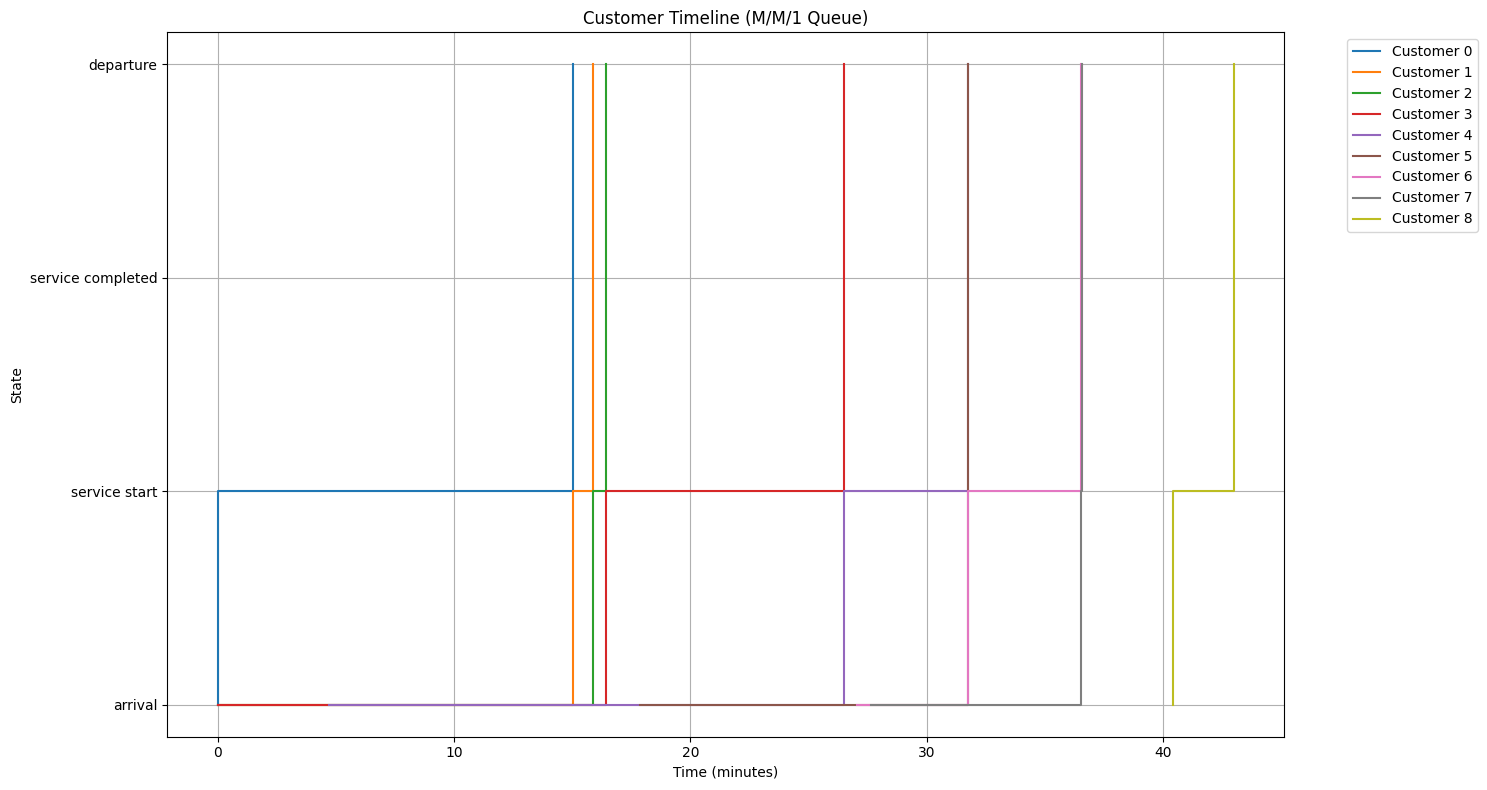


Performance Metrics:
Average waiting time: 10.74 minutes
Maximum waiting time: 21.79 minutes
Minimum waiting time: 0.00 minutes

Average service time: 4.35 minutes
System utilization: 86.98%

Event Log:
     time       name             event
 0.000000 Customer 0           arrival
 0.000000 Customer 1           arrival
 0.000000 Customer 2           arrival
 0.000000 Customer 3           arrival
 0.000000 Customer 0     service start
 4.692681 Customer 4           arrival
15.050607 Customer 0 service completed
15.050607 Customer 0         departure
15.050607 Customer 1     service start
15.898732 Customer 1 service completed
15.898732 Customer 1         departure
15.898732 Customer 2     service start
16.425395 Customer 2 service completed
16.425395 Customer 2         departure
16.425395 Customer 3     service start
17.860138 Customer 5           arrival
26.481549 Customer 3 service completed
26.481549 Customer 3         departure
26.481549 Customer 4     service start
27.050959 Custom

In [18]:
import numpy.random as rnd
import simpy
import pandas as pd
import matplotlib.pyplot as plt

# Simulation parameters
RANDOM_SEED = 42
NUM_DESKS = 1  # Single server for M/M/1
SIM_TIME = 45  # Simulation time in minutes
AVG_SERVICE_TIME = 5  # Average service time in minutes
AVG_ARRIVAL_INTERVAL = 10  # Average time between arrivals

events = []

class Bank:
    def __init__(self, env, num_desks):
        self.env = env
        self.desk = simpy.Resource(env, num_desks)
    
    def service(self, customer):
        """Service process with exponential service time"""
        service_time = rnd.exponential(scale=AVG_SERVICE_TIME)
        yield self.env.timeout(service_time)
        completion_pct = rnd.randint(75, 99)
        events.append({
            'time': self.env.now,
            'name': customer,
            'event': 'service completed',
            'service_time': service_time
        })

def customer(env, name, bank):
    """Customer process with arrival, waiting, and departure events"""
    arrival_time = env.now
    events.append({
        'time': arrival_time,
        'name': name,
        'event': 'arrival'
    })
    
    with bank.desk.request() as req:
        # Request the service desk
        yield req
        service_start = env.now
        waiting_time = service_start - arrival_time
        events.append({
            'time': service_start,
            'name': name,
            'event': 'service start',
            'waiting_time': waiting_time
        })
        
        # Get service
        yield env.process(bank.service(name))
        
        # Departure
        departure_time = env.now
        events.append({
            'time': departure_time,
            'name': name,
            'event': 'departure'
        })

def setup(env, num_desks):
    """Setup simulation with initial customers and continuous arrivals"""
    bank = Bank(env, num_desks)
    
    # Create initial customers
    for i in range(4):
        env.process(customer(env, f'Customer {i}', bank))
    
    # Create more customers during simulation
    i = 4
    while True:
        yield env.timeout(rnd.exponential(scale=AVG_ARRIVAL_INTERVAL))
        env.process(customer(env, f'Customer {i}', bank))
        i += 1

# Run simulation
print('M/M/1 Bank Simulation')
rnd.seed(RANDOM_SEED)
env = simpy.Environment()
env.process(setup(env, NUM_DESKS))
env.run(until=SIM_TIME)

# Process results
df = pd.DataFrame(events)

# Plot timeline
plt.figure(figsize=(15, 8))
for name in df['name'].unique():
    customer_events = df[df['name'] == name].sort_values('time')
    plt.step(customer_events['time'], customer_events['event'], 
             where='post', label=name)
plt.xlabel('Time (minutes)')
plt.ylabel('State')
plt.title('Customer Timeline (M/M/1 Queue)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

# Calculate performance metrics
waiting_times = df[df['event'] == 'service start']['waiting_time'].dropna()
service_times = df[df['event'] == 'service completed']['service_time'].dropna()

if not waiting_times.empty:
    print("\nPerformance Metrics:")
    print(f"Average waiting time: {waiting_times.mean():.2f} minutes")
    print(f"Maximum waiting time: {waiting_times.max():.2f} minutes")
    print(f"Minimum waiting time: {waiting_times.min():.2f} minutes")
    print(f"\nAverage service time: {service_times.mean():.2f} minutes")
    print(f"System utilization: {(service_times.sum()/SIM_TIME)*100:.2f}%")
else:
    print("\nNo customers completed service during simulation")

# Print event log
print("\nEvent Log:")
print(df[['time', 'name', 'event']].sort_values('time').to_string(index=False))

Bank Simulation
Customer 0 arrives at the Bank at 0.00.
Customer 1 arrives at the Bank at 0.00.
Customer 2 arrives at the Bank at 0.00.
Customer 3 arrives at the Bank at 0.00.
Customer 0 starts service at 0.00 (waited 0.00 minutes).
Customer 1 starts service at 0.00 (waited 0.00 minutes).
Customer 2 starts service at 0.00 (waited 0.00 minutes).
The Bank agent is serving 81% of Customer 2's service request.
Customer 2 leaves the Bank at 4.56.
Customer 3 starts service at 4.56 (waited 4.56 minutes).
Customer 4 arrives at the Bank at 4.69.
Customer 5 arrives at the Bank at 5.75.
The Bank agent is serving 95% of Customer 1's service request.
Customer 1 leaves the Bank at 6.58.
Customer 4 starts service at 6.58 (waited 1.89 minutes).
The Bank agent is serving 98% of Customer 3's service request.
Customer 3 leaves the Bank at 7.52.
Customer 5 starts service at 7.52 (waited 1.77 minutes).
The Bank agent is serving 95% of Customer 4's service request.
Customer 4 leaves the Bank at 11.18.
Custo

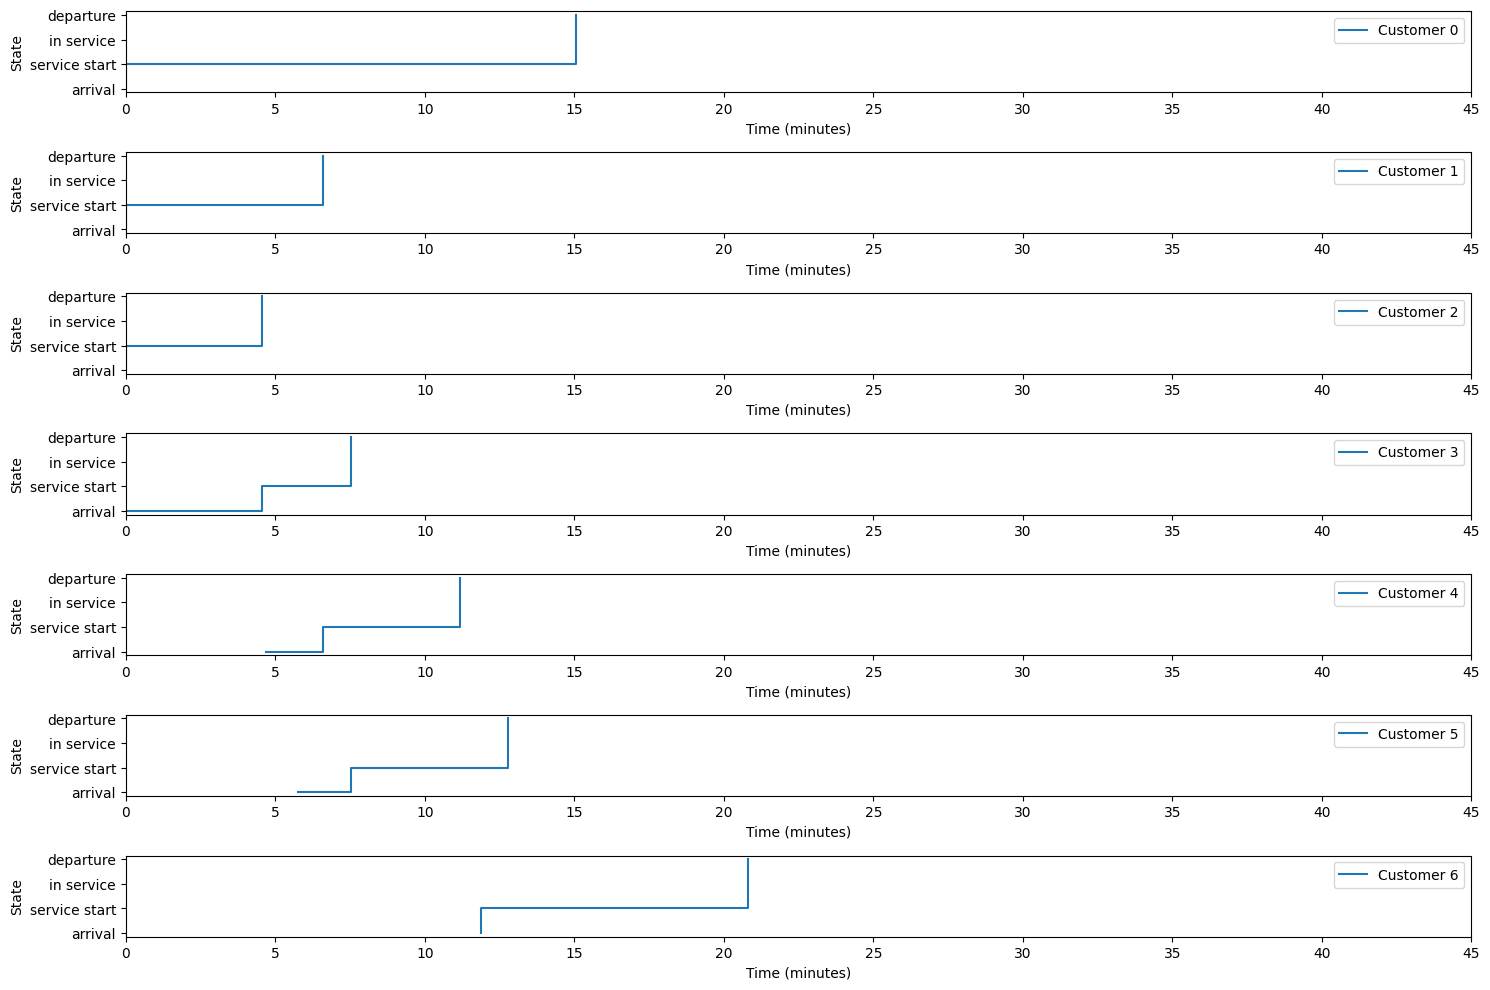


Average waiting time: 1.18 minutes
Maximum waiting time: 4.56 minutes
Minimum waiting time: 0.00 minutes

Event Log:
         time        name          event
0    0.000000  Customer 0        arrival
4    0.000000  Customer 0  service start
1    0.000000  Customer 1        arrival
5    0.000000  Customer 1  service start
2    0.000000  Customer 2        arrival
6    0.000000  Customer 2  service start
3    0.000000  Customer 3        arrival
7    4.564713  Customer 2     in service
8    4.564713  Customer 2      departure
9    4.564713  Customer 3  service start
10   4.692681  Customer 4        arrival
11   5.746007  Customer 5        arrival
12   6.583728  Customer 1     in service
13   6.583728  Customer 1      departure
14   6.583728  Customer 4  service start
15   7.516157  Customer 3     in service
16   7.516157  Customer 3      departure
17   7.516157  Customer 5  service start
18  11.179139  Customer 4     in service
19  11.179139  Customer 4      departure
20  11.893969  Custom

In [17]:
#your code here for M/M/3
import numpy.random as rnd
import simpy
import pandas as pd
import matplotlib.pyplot as plt

# Simulation parameters
RANDOM_SEED = 42
NUM_DESKS = 3  # Number of service desks
SIM_TIME = 45  # Simulation time in minutes
SERVICETIME = 5  # Average service time
T_INTER = 10  # Average time between customer arrivals

events = []

class Bank(object):
    def __init__(self, env, num_desks, service_time):
        self.env = env
        self.desk = simpy.Resource(env, num_desks)
        self.serviceTime = service_time

    def service(self, customer):
        """Service process with random service time"""
        SERVICETIME = rnd.exponential(scale=self.serviceTime)
        yield self.env.timeout(SERVICETIME)
        print(f"The Bank agent is serving {rnd.randint(75, 99)}% of {customer}'s service request.")
        events.append([env.now, customer, 'in service'])

def customer(env, name, bk):
    """Customer process"""
    arrival_time = env.now
    print(f'{name} arrives at the Bank at {arrival_time:.2f}.')
    events.append([arrival_time, name, 'arrival'])
    
    with bk.desk.request() as request:
        # Request a desk
        yield request
        service_start = env.now
        waiting_time = service_start - arrival_time
        events.append([service_start, name, 'service start', waiting_time])
        print(f'{name} starts service at {service_start:.2f} (waited {waiting_time:.2f} minutes).')
        
        yield env.process(bk.service(name))
        
        departure_time = env.now
        events.append([departure_time, name, 'departure'])
        print(f'{name} leaves the Bank at {departure_time:.2f}.')

def setup(env, num_desks, service_time, t_inter):
    """Setup simulation with initial customers and continuous arrivals"""
    bk = Bank(env, num_desks, service_time)
    
    # Create initial customers
    for i in range(4):
        env.process(customer(env, f'Customer {i}', bk))
    
    # Create more customers during simulation
    i = 4  # Start counting from where we left off
    while True:
        yield env.timeout(rnd.exponential(scale=t_inter))
        env.process(customer(env, f'Customer {i}', bk))
        i += 1

# Setup and run simulation
print('Bank Simulation')
rnd.seed(RANDOM_SEED)
env = simpy.Environment()
env.process(setup(env, NUM_DESKS, SERVICETIME, T_INTER))
env.run(until=SIM_TIME)

# Process results
df = pd.DataFrame(events, columns=['time', 'name', 'event', 'waiting_time'])

# Plot timeline
fig, axs = plt.subplots(len(df['name'].unique()), 1, figsize=(15, 10))
for ax, name in zip(axs.flatten(), df['name'].unique()):
    df_c = df[df['name'] == name]
    ax.step(df_c['time'], df_c['event'], where='post', label=name)
    ax.set_xlabel('Time (minutes)')
    ax.set_ylabel('State')
    ax.set_xlim(0, SIM_TIME)
    ax.legend()
plt.tight_layout()
plt.show()

# Calculate performance metrics
waiting_times = df[df['event'] == 'service start']['waiting_time'].dropna()
if not waiting_times.empty:
    print(f"\nAverage waiting time: {waiting_times.mean():.2f} minutes")
    print(f"Maximum waiting time: {waiting_times.max():.2f} minutes")
    print(f"Minimum waiting time: {waiting_times.min():.2f} minutes")
else:
    print("\nNo customers completed service during simulation")

# Print event log
print("\nEvent Log:")
print(df[['time', 'name', 'event']].sort_values(['time', 'name']))
